In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/celebrityprofiling/training-dataset/celebrity-feeds.ndjson
/kaggle/input/celebrityprofiling/training-dataset/labels.ndjson
/kaggle/input/celebrityprofiling/supplement-dataset/celebrity-feeds.ndjson
/kaggle/input/celebrityprofiling/supplement-dataset/labels.ndjson


In [2]:
!pip install ndjson

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
import ndjson

# load from file-like objects
with open('/kaggle/input/celebrityprofiling/training-dataset/celebrity-feeds.ndjson') as f:
    data1 = ndjson.load(f)
    
with open('/kaggle/input/celebrityprofiling/supplement-dataset/celebrity-feeds.ndjson') as f:
    data2 = ndjson.load(f)

In [4]:
tweets=data1+data2

In [5]:
# load from file-like objects
with open('/kaggle/input/celebrityprofiling/supplement-dataset/labels.ndjson') as f:
    data1 = ndjson.load(f)
    
# load from file-like objects
with open('/kaggle/input/celebrityprofiling/training-dataset/labels.ndjson') as f:
    data2 = ndjson.load(f)    

In [6]:
labels=data2+data1

In [7]:
len(labels)

10185

In [8]:
#Number of Tweets
print("Number of Celebrities:     "+str(len(tweets)))

Number of Celebrities:     10185


In [9]:
tweet=[]
birthyear=[]
gender=[]
occupation=[]
average_tweet=[]
number_words=[]
ids=[]
for i in range(len(tweets)):
    for j in range(len(tweets[i]["text"])):
        tweet.append(tweets[i]["text"][j])
        birthyear.append(labels[i]['birthyear'])
        gender.append(labels[i]['gender'])
        occupation.append(labels[i]['occupation'])
        ids.append(labels[i]['id'])

    average_tweet.append(len(tweets[i]["text"]))
    for k in range(len(tweets[i]["text"])):
        number_words.append(len(tweets[i]["text"][k].split()))

In [10]:
total_tweet=sum(average_tweet)

In [11]:
celebrities=len(average_tweet)

In [12]:
print("Number of Celebrities:     "+str(len(tweets)))
print("Number Of Tweets/Celebrity:     "+str(total_tweet/celebrities))
print("Total Number Of Tweets:     "+str(total_tweet))
print("Total Number Of Words/Tweet:     "+str(sum(number_words)/total_tweet))

Number of Celebrities:     10185
Number Of Tweets/Celebrity:     2526.5133038782524
Total Number Of Tweets:     25732538
Total Number Of Words/Tweet:     14.389108956139498


In [13]:
male=0
female=0

for k in range(len(labels)):
    if labels[k]['gender']=="male":
        male=male+1
        
    if labels[k]['gender']=="female":
        female=female+1
        

In [14]:
print("Number of Celebrities{male}:     "+str(male)+"  |  Percentage of Celebrities{male}:       "+str(male/(male+female))+"%")
print("Number of Celebrities{female}:     "+str(female)+"  |   Percentage of Celebrities{female}:     "+str(female/(male+female))+"%")

Number of Celebrities{male}:     7275  |  Percentage of Celebrities{male}:       0.7142857142857143%
Number of Celebrities{female}:     2910  |   Percentage of Celebrities{female}:     0.2857142857142857%


In [15]:
birthyear_list=[]

for k in range(len(labels)):
    birthyear_list.append(labels[k]['birthyear'])
        

In [16]:
average_age=0
this_year=2020
for k in range(len(birthyear_list)):
    average_age=average_age+this_year-int(birthyear_list[k])
        
average_age=average_age/len(birthyear_list)

In [17]:
print("Average Age Of Celebrities:     "+str(average_age))

Average Age Of Celebrities:     42.81315660284732


In [18]:
set(occupation)

{'creator', 'performer', 'politics', 'sports'}

In [19]:
creator=0
performer=0
politics=0
sports=0

for k in range(len(labels)):
    if labels[k]['occupation']=="creator":
        creator=creator+1
        
    if labels[k]['occupation']=="performer":
        performer=performer+1

                
    if labels[k]['occupation']=="politics":
        politics=politics+1
        
                
    if labels[k]['occupation']=="sports":
        sports=sports+1
                

In [20]:
print("Number of creator in the dataset:     "+str(creator))
print("Number of performer in the dataset:     "+str(performer))
print("Number of politics in the dataset:    "+str(politics))
print("Number of sports in the dataset:     "+str(sports))

Number of creator in the dataset:     1724
Number of performer in the dataset:     4944
Number of politics in the dataset:    480
Number of sports in the dataset:     3037


In [21]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

In [22]:
celebrity = {
    'id':ids,
    'text': tweet,
        'birthyear': birthyear,
         'gender':gender,
           'occupation':occupation
        }


df = pd.DataFrame(celebrity)

In [23]:
df.head()

,id,text,birthyear,gender,occupation
0,1,"RT @ateyo_: Please support Artour ""@Arteezy"" B...",1996,male,sports
1,1,@Clairvoyance102 You already know,1996,male,sports
2,1,Wtf just happened this boy is a beast,1996,male,sports
3,1,Got something coming boys @ateyo_ https://t.co...,1996,male,sports
4,1,@PieLieDieDota nice wallpaper,1996,male,sports


In [24]:
df.shape

(25732538, 5)

In [25]:
df.to_csv("celebrity_profiling.csv")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25732538 entries, 0 to 25732537
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id          int64 
 1   text        object
 2   birthyear   object
 3   gender      object
 4   occupation  object
dtypes: int64(1), object(4)
memory usage: 981.6+ MB


In [27]:
df.describe()

,id
count,2.573254e+07
mean,5.062078e+03
std,2.955321e+03
min,1.000000e+00
25%,2.492000e+03
50%,5.061000e+03
75%,7.619000e+03
max,1.018500e+04


In [28]:
del data1
del data2

In [29]:
def words_without_stops(df1):
    comment_words = '' 
    stopwords = set(STOPWORDS) 

    # iterate through the csv file 
    for val in df1.text: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        comment_words += " ".join(tokens)+" "
        
    return comment_words


In [30]:
occupation_list=list(set(occupation))

In [31]:
df1=df.sample(n=1000)

In [32]:
comment_words=words_without_stops(df1)

In [33]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 




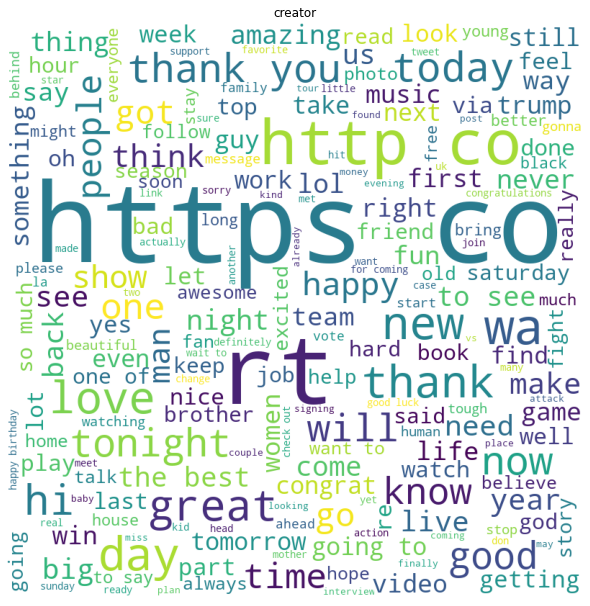

In [34]:

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("creator") 
  
plt.show() 

In [35]:
df1=df[df['occupation']=="creator"]
df1=df1.sample(n=1000)

In [36]:
comment_words=words_without_stops(df1)

In [37]:

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 




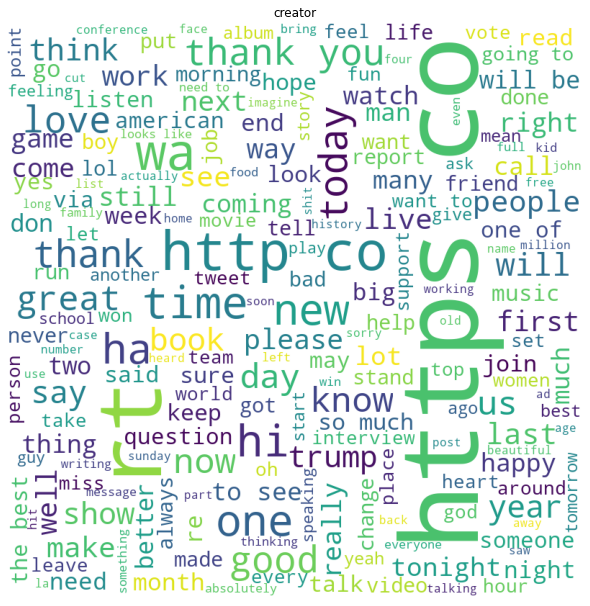

In [38]:

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("creator") 
  
plt.show() 

In [39]:
df1=df[df['occupation']=="performer"]
df1=df1.sample(n=1000)

In [40]:
comment_words=words_without_stops(df1)

In [41]:
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 




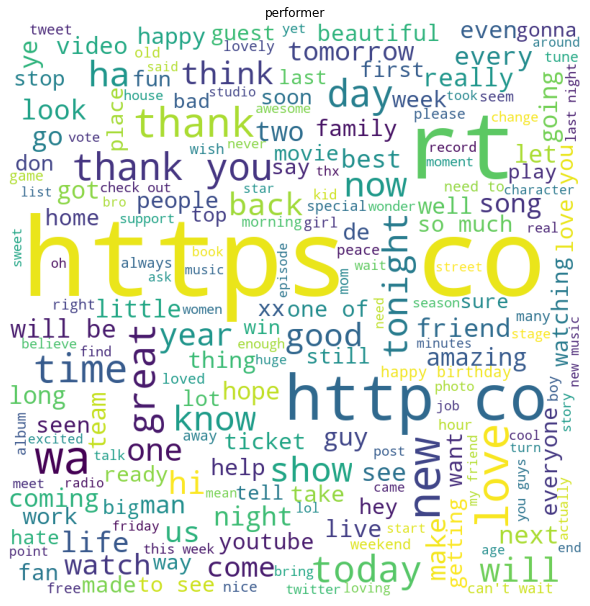

In [42]:

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("performer") 
  
plt.show() 

In [43]:
df1=df[df['occupation']=="politics"]
df1=df1.sample(n=1000)

In [44]:
comment_words=words_without_stops(df1)

In [45]:
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 




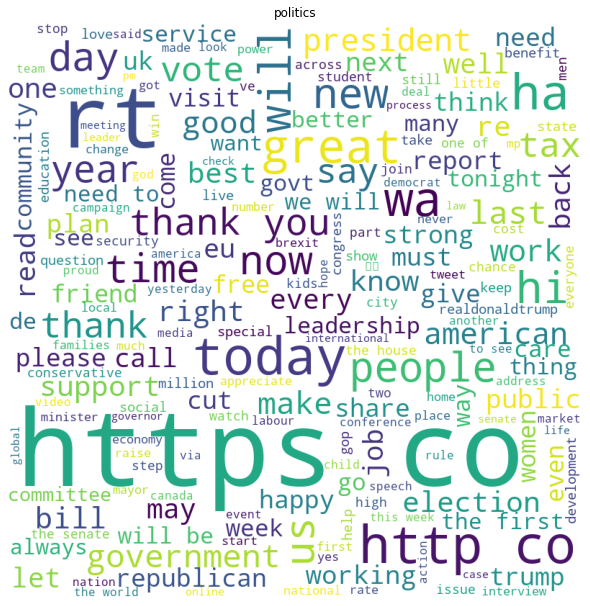

In [46]:

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("politics") 
  
plt.show() 

In [47]:
df1=df[df['occupation']=="sports"]
df1=df1.sample(n=1000)

In [48]:
comment_words=words_without_stops(df1)

In [49]:
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 




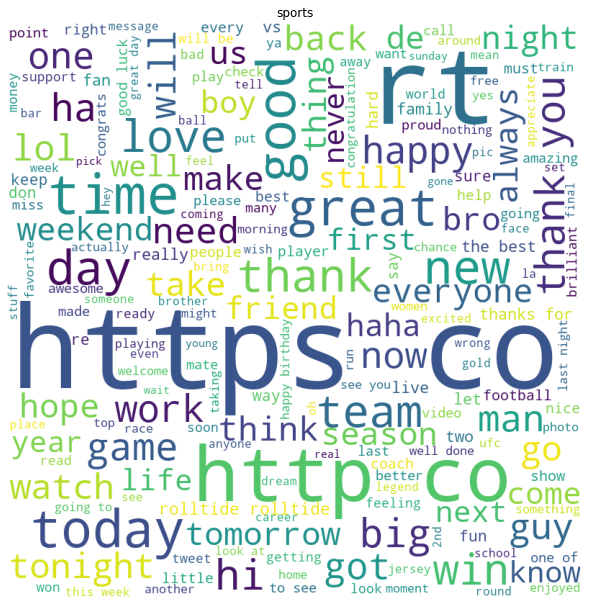

In [50]:

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("sports") 
  
plt.show() 

In [51]:
df1=df[df['gender']=="male"]
df1=df1.sample(n=1000)

In [52]:
comment_words=words_without_stops(df1)

In [53]:
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 




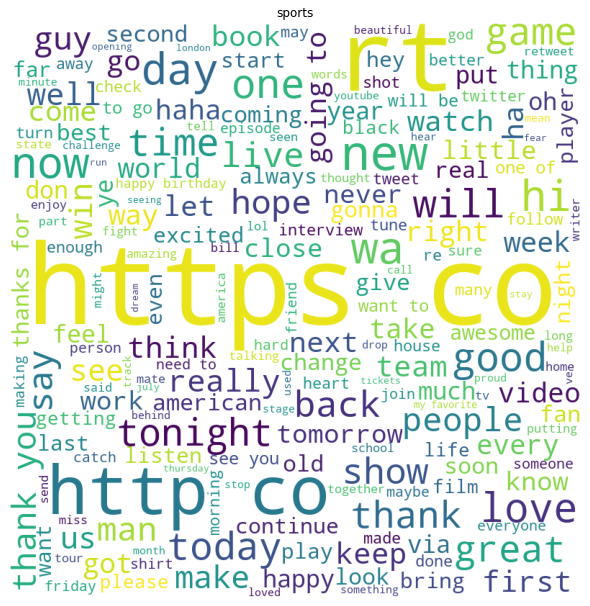

In [54]:

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("sports") 
  
plt.show() 

In [55]:
df1=df[df['gender']=="male"]
df1=df1.sample(n=1000)

In [56]:
comment_words=words_without_stops(df1)

In [57]:
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 




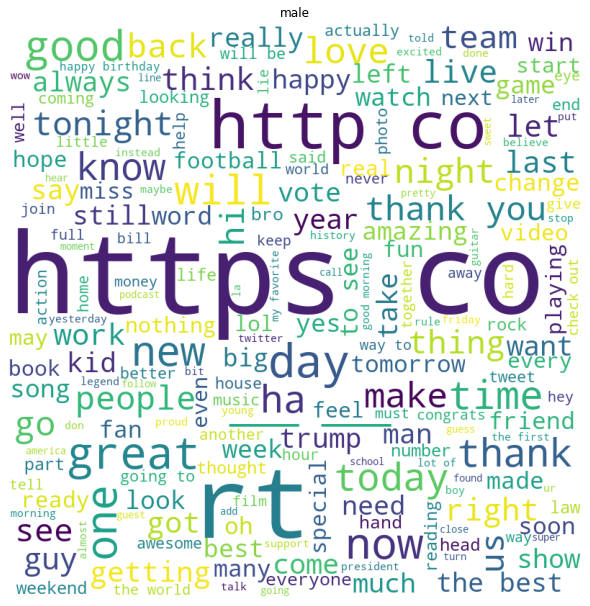

In [58]:

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("male") 
  
plt.show() 

In [59]:
df1=df[df['gender']=="female"]
df1=df1.sample(n=1000)

In [60]:
comment_words=words_without_stops(df1)

In [61]:
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 




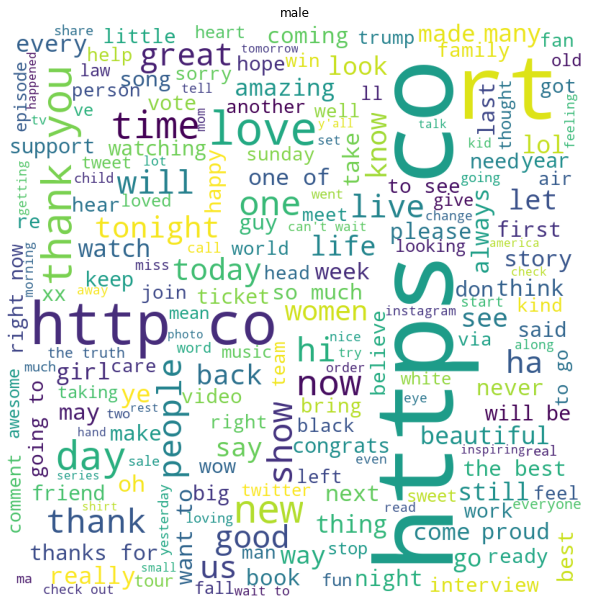

In [62]:

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("male") 
  
plt.show() 